# Sobre o notebook

Aproveite esse espaço para as atividades do curso de Data Visualization: gráficos de composição e relacionamento da Alura. Aqui você pode escrever e testar os códigos dos diversos desafios envolvendo os aprendizados de cada aula.

Este notebook foi construído com espaço para as células dos desafios propostos no curso, com ele você tem espaço para construir e executar suas soluções


## Paleta de Cores

Vamos compartilhar aqui a paleta de cores que usamos durante o curso pra você executar e usar em seu projeto, mas sinta-se livre para construir a sua propria.

In [1]:
# Definindo a paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5, AZUL6 = '#174A7E', '#4A81BF', "#6495ED", '#2596BE', '#94AFC5', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5, CINZA6, BRANCO = '#231F20', '#414040', '#555655', '#A6A6A5', '#BFBEBE', '#DEE2E6', '#FFFFFF'
VERMELHO1, VERMELHO2, LARANJA1 = '#C3514E',	'#E6BAB7',	'#F79747'
VERDE1, VERDE2, VERDE3 = '#0C8040',	'#9ABB59', '#9ECCB3'

## Aula 01 - Proporção dos dados

### Desafio 1

Neste desafio, a missão é construir as visualizações que respondam aos seguintes questionamentos:

Desafio 1

Como estão dispostos os valores agregados de serviços por região do Brasil no ano de 2018?

In [2]:
import pandas as pd

In [3]:
pib = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/dataviz-graficos-composicao-relacionamento/main/dados/pib_br_2002_2020_estados.csv')
pib

,ano,sigla_uf,regiao,pib,impostos_liquidos,va,va_agropecuaria,va_industria,va_servicos,va_adespss
0,2002,RO,Norte,7467629886,839731192,6627898698,715526872,1191090432,2484579193,2236702207
1,2003,RO,Norte,9425010486,1108434936,8316575548,1278658831,1216605061,3376727040,2444584625
2,2004,RO,Norte,11004641436,1288806654,9715834778,1288515348,1674933817,3986529419,2765856199
3,2005,RO,Norte,12511821181,1476144194,11035676990,1342222120,1887932121,4603783904,3201738843
4,2006,RO,Norte,13054713344,1613809974,11440903374,1238006193,2210692147,4320526746,3671678293
...,...,...,...,...,...,...,...,...,...,...
508,2016,DF,Centro-Oeste,235540044811,29145619376,206394425435,820754661,9662357225,103859865830,92051447720
509,2017,DF,Centro-Oeste,244722249337,29120461647,215601787690,828313642,8448768236,108322119432,98002586380
510,2018,DF,Centro-Oeste,254817204692,28692287369,226124917323,1022690641,9541298290,113768086938,101792841454
511,2019,DF,Centro-Oeste,273613711477,30686607647,242927103829,992393584,9453608031,125261853488,107219248727


In [4]:
pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ano                513 non-null    int64 
 1   sigla_uf           513 non-null    object
 2   regiao             513 non-null    object
 3   pib                513 non-null    int64 
 4   impostos_liquidos  513 non-null    int64 
 5   va                 513 non-null    int64 
 6   va_agropecuaria    513 non-null    int64 
 7   va_industria       513 non-null    int64 
 8   va_servicos        513 non-null    int64 
 9   va_adespss         513 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 40.2+ KB


In [5]:
pib2018 = pib.copy()
pib2018 = pib.query('ano ==2018')[['pib', 'va_servicos', 'regiao']]
pib2018['%ser'] = round(pib2018.va_servicos/(pib2018.va_servicos.sum()) * 100,1)
pib2018 = pib2018.groupby('regiao').sum()

pib2018

,pib,va_servicos,%ser
regiao,,,
Centro-Oeste,694910923213,296250896281,8.9
Nordeste,1004827439619,433449662991,13.0
Norte,387535315655,133394247965,4.0
Sudeste,3721316870999,1933221862566,57.8
Sul,1195550450502,546627330178,16.4


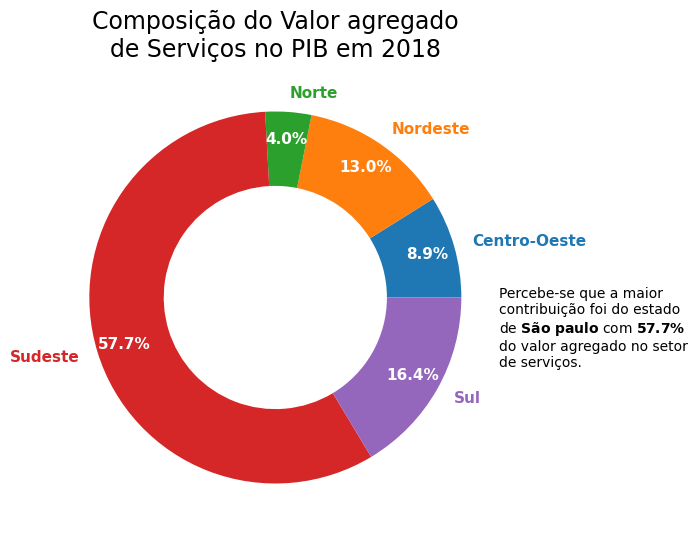

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,8))
ax.set_title('Composição do Valor agregado\nde Serviços no PIB em 2018', fontsize = 17)
ptc, text, _ = ax.pie(data= pib2018, x = '%ser', labels = pib2018.index, autopct = '%.1f%%', pctdistance = 0.85,
                      textprops = {"size":11, "fontweight":'bold', 'color':'white'}, wedgeprops = dict(width = 0.4))

for i, p in enumerate(ptc):
  text[i].set_color(p.get_facecolor())

ax.text(0.98,0.35, 'Percebe-se que a maior\ncontribuição foi do estado\nde $\\bf{São\ paulo}$ com $\\bf57.7\%$\ndo valor agregado no setor\nde serviços.',
        transform = ax.transAxes);

### Desafio 2

Desafio 2

Qual a participação da Região Norte nos valores agregados da indústria de todo Brasil nos anos de 2010 e 2020? Podemos notar algum comportamento?

In [7]:
pib_norte = pib.copy()

pib_2010 = pib_norte.query('ano == 2010')[['regiao', 'va_industria']]
pib_2020 = pib_norte.query('ano == 2020')[['regiao', 'va_industria']]

pib_2010 = pib_2010.groupby('regiao').sum()
pib_2020 = pib_2020.groupby('regiao').sum()

pib_2010.loc[pib_2010.index != 'Norte', 'est'] = "Outros Estados"
pib_2010.loc[pib_2010.index == 'Norte', 'est'] = 'Norte'
pib_2010 = pib_2010.groupby('est').sum()

pib_2020.loc[pib_2020.index != 'Norte', 'est'] = "Outros Estados"
pib_2020.loc[pib_2020.index == 'Norte', 'est'] = 'Norte'
pib_2020 = pib_2020.groupby('est').sum()

display(pib_2010, pib_2020)



,va_industria
est,
Norte,58665438171
Outros Estados,845492561850


,va_industria
est,
Norte,137740478879
Outros Estados,1346596521109


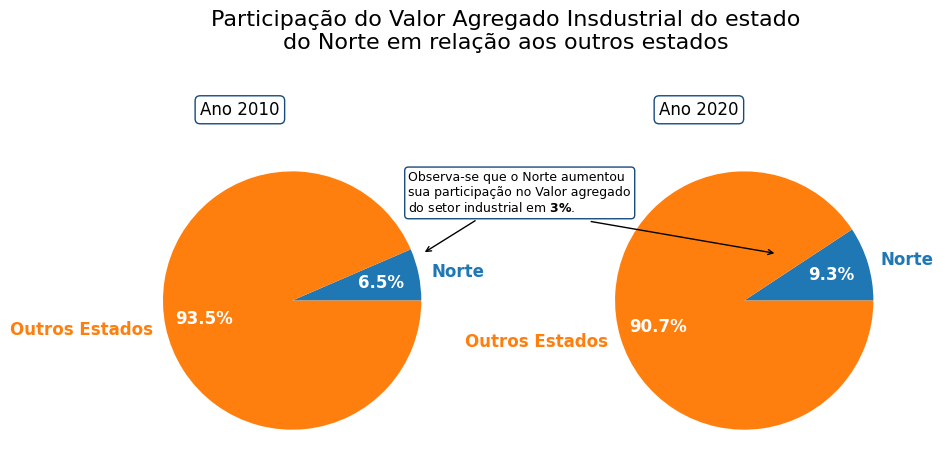

In [8]:
fig, axs  = plt.subplots(1, 2, figsize = (10,6))
fig.subplots_adjust(wspace=0.4)

fig.suptitle('Participação do Valor Agregado Insdustrial do estado\ndo Norte em relação aos outros estados', size = 16)

ptc, text, _ = axs[0].pie(data = pib_2010, x = 'va_industria', labels = pib_2010.index, autopct = '%.1f%%',
                          textprops= {'size': 12, 'fontweight': 'bold', 'color': 'white'}, pctdistance = 0.7)

axs[0].annotate('Ano 2010', xy= (50,250), xycoords = 'axes points', size = 12,
                bbox = {'boxstyle': 'round', 'fc': 'white', 'ec':AZUL1} )

for i, p in enumerate(ptc):
  text[i].set_color(p.get_facecolor())


ptc, text, _ = axs[1].pie(data = pib_2020, x = 'va_industria', labels = pib_2020.index, autopct = '%.1f%%',
                          textprops= {'size': 12, 'fontweight': 'bold', 'color': 'white'}, pctdistance = 0.7)
axs[1].annotate('Ano 2020', xy= (55,250), xycoords = 'axes points', size = 12,
                bbox = {'boxstyle': 'round', 'fc': 'white', 'ec':AZUL1} )

for i, p in enumerate(ptc):
  text[i].set_color(p.get_facecolor())


axs[0].annotate('Observa-se que o Norte aumentou\nsua participação no Valor agregado\ndo setor industrial em $\\bf3\%$.', xy=(210,150),
                xycoords = 'axes points', size = 9, bbox= {'boxstyle':'round', 'fc': 'white', 'ec':AZUL1}, arrowprops = {'arrowstyle':'->'},
                xytext= (200,180), textcoords= 'axes points')
axs[1].annotate('', xy=(140,150), xycoords = 'axes points', size = 9,
                bbox= {'boxstyle':'round', 'fc': 'white', 'ec':AZUL1}, arrowprops = {'arrowstyle':'->'},
                xytext= (1,174), textcoords= 'axes points');

## Aula 02 - Compondo dados estáticos

### Desafio 1

Como está composto o PIB do Estado de São Paulo em 2020 partindo do valor agregado bruto dos bens e serviços produzidos e os impostos líquidos?

In [9]:
import numpy as np

In [10]:
sp2020 = pib.copy()

sp2020 = sp2020.query('sigla_uf == "SP" and ano==2020' )[['va', 'impostos_liquidos', 'pib']]
sp2020.rename(columns = {'va':'Valor Agregado', 'impostos_liquidos':'Impostos Líquidos', 'pib': 'PIB'}, inplace=True)
sp2020 = sp2020.melt(var_name= 'indicadores', value_name ='valores')
sp2020['Medidas'] = ['absolute', 'relative', 'total']
sp2020['valores_str'] = (sp2020['valores']/1e9).map('R${:,.2f} Bi'.format)
sp2020

,indicadores,valores,Medidas,valores_str
0,Valor Agregado,2014850308310,absolute,"R$2,014.85 Bi"
1,Impostos Líquidos,362788671543,relative,R$362.79 Bi
2,PIB,2377638979835,total,"R$2,377.64 Bi"


In [11]:
import plotly.graph_objects as go

fig = go.Figure(go.Waterfall(name = '', orientation = 'v' , measure = sp2020['Medidas'], x = sp2020['indicadores'], y = sp2020['valores'],
                             text = sp2020['valores_str'], textposition = 'outside'))
fig.update_layout(width = 1000, height = 600, title_text = 'PIB do Estado de São Paulo no ano de 2020 em Bilhoes de Reais',
                  font = {'family':"Times New Roman", "size":16}, title_font_size = 26,  title_pad_l = 50)

fig.update_yaxes(showticklabels=False)

fig.update_traces(hovertemplate = "<b>%{x}</b> = %{text}")

fig.show()



### Desafio 2

Qual a evolução anual do valor agregado de serviços na Região Nordeste entre os anos de 2016 a 2020?

In [12]:
nordeste = pib.copy()
nordeste = nordeste.query('regiao == "Nordeste" and ano == [2016, 2017, 2018, 2019, 2020]')[['va_servicos', 'ano']]
nordeste = nordeste.sort_values('ano').groupby('ano').sum()
nordeste['va_servicos'] = nordeste['va_servicos'].diff().fillna(nordeste['va_servicos'])
nordeste.reset_index(inplace= True)
nordeste['medidas'] = ['absolute', 'relative','relative', 'relative', 'relative']
nordeste['valores str'] = (nordeste['va_servicos']/1e9).apply('R$ {:,.2f} Bi'.format)
nordeste.rename(columns = {'ano': 'Ano', 'va_servicos': 'Valor Agregado Serviços'}, inplace= True)

nordeste


,Ano,Valor Agregado Serviços,medidas,valores str
0,2016,3.911491e+11,absolute,R$ 391.15 Bi
1,2017,2.274145e+10,relative,R$ 22.74 Bi
2,2018,1.955915e+10,relative,R$ 19.56 Bi
3,2019,1.721202e+10,relative,R$ 17.21 Bi
4,2020,-1.455888e+10,relative,R$ -14.56 Bi


In [13]:
atualizacao= pd.Series({'Ano': 'Total',
              'Valor Agregado Serviços': nordeste['Valor Agregado Serviços'].sum(),
              'medidas':'total',
              'valores str':'R$ {:,.2f} Bi'.format(nordeste['Valor Agregado Serviços'].sum()/1e9)}).to_frame().T
nordeste = pd.concat([nordeste, atualizacao], axis = 0, ignore_index=True)
nordeste

,Ano,Valor Agregado Serviços,medidas,valores str
0,2016,391149062027.0,absolute,R$ 391.15 Bi
1,2017,22741449644.0,relative,R$ 22.74 Bi
2,2018,19559151320.0,relative,R$ 19.56 Bi
3,2019,17212017686.0,relative,R$ 17.21 Bi
4,2020,-14558880800.0,relative,R$ -14.56 Bi
5,Total,436102799877.0,total,R$ 436.10 Bi


In [14]:
fig = go.Figure(go.Waterfall(name= '', orientation = 'v', measure = nordeste['medidas'], y = nordeste['Valor Agregado Serviços'],
                             text = nordeste['valores str']))

fig.update_layout(width = 1000, height = 600, title_text = 'Valor Agregado do setor de Serviços no PIB da regiao do Nordeste de 2016 a 2020',
                  font = {'family':"Times New Roman", "size":16}, title_font_size = 24,  title_pad_l = 35)

fig.update_xaxes(tickmode='array', tickvals= np.arange(0,7), ticktext=nordeste['Ano'])

fig.update_yaxes(showticklabels=False)

fig.update_traces(hovertemplate = "<b>%{x}</b> = %{text}")

fig.add_annotation(text = 'Apenas o ano de 2020 apresentou<br>um decréscimo no periodo analisado.',
                   align="left", axref = 'x', ayref='y', x=4, y=390e9, ax=3, ay=250e9,
                   arrowhead=1, arrowside = "start", showarrow=True, arrowwidth=2, arrowcolor=CINZA3,
                   bordercolor= CINZA3, borderwidth=1, borderpad=4)


fig.show()

## Aula 03 - Compondo dados dinâmicos

### Desafio 1

Desafio 1:

Como está composto, em valores absolutos, o PIB por região dos 4 últimos anos do conjunto de dados (2017 a 2020)?

In [15]:
pib_regiao = pib.copy()
anos = [i for i in range(2017,2021)]
pib_regiao = pib_regiao.query('ano == @anos')[['regiao', 'ano', 'pib']]
pib_regiao.set_index('ano', inplace = True)
pib_regiao['pib'] = (pib_regiao['pib']/1e12).round(2)
pib_regiao = pd.crosstab(index = pib_regiao.index, columns = pib_regiao.regiao, values = pib_regiao.pib, aggfunc ="sum")
pib_regiao = pib_regiao[['Sudeste', 'Sul', 'Nordeste', 'Centro-Oeste', 'Norte']]
pib_regiao

regiao,Sudeste,Sul,Nordeste,Centro-Oeste,Norte
row_0,,,,,
2017,3.48,1.12,0.95,0.66,0.36
2018,3.72,1.20,1.01,0.70,0.39
2019,3.92,1.27,1.04,0.73,0.43
2020,3.95,1.31,1.09,0.79,0.49


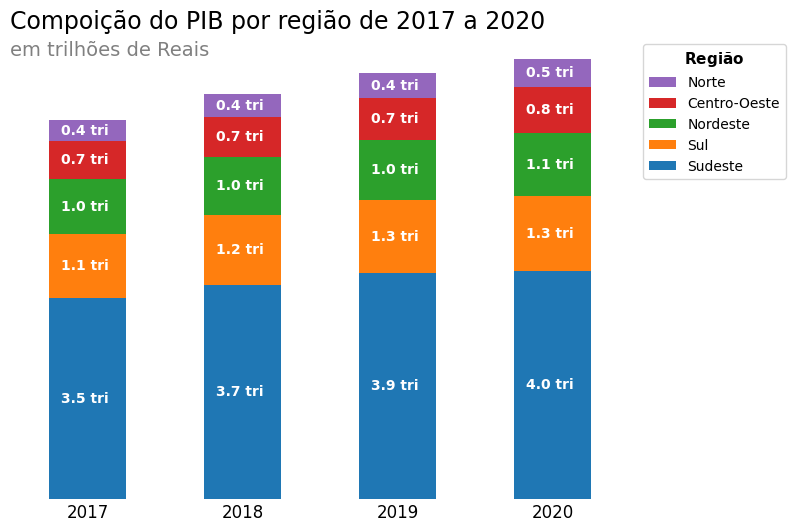

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,6))

pib_regiao.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_xlabel('')
ax.xaxis.set_tick_params(size=0, rotation=0, labelsize= 12)
ax.set_yticks([])
ax.set_title('Compoição do PIB por região de 2017 a 2020', fontsize=17, loc= 'left')
ax.text(s ='em trilhões de Reais', x = 0, y = 0.96, transform = ax.transAxes, fontsize = 14, color ='grey')
ax.set_frame_on(False)

ax.legend(bbox_to_anchor=(1.01, 1), reverse = True, title='$\\bf{Região}$', title_fontsize  = 11, fontsize = 10)

for container in ax.containers:
  label = [f'{valor.get_height():.1f} tri ' for valor in container]
  ax.bar_label(container, labels = label, fontsize = 10, color = 'white', label_type = 'center', fontweight = 'bold')


### Desafio 2

Como está composto os valores agregados brutos dos bens e serviços (em valor absoluto) em relação aos Estados da região Norte no ano de 2020?

In [17]:
norte2020 = pib.copy()
norte2020 = norte2020.query('ano ==2020 and regiao == "Norte"')[['sigla_uf', 'va_agropecuaria', 'va_industria' , 'va_servicos', 'va_adespss']]
norte2020.set_index('sigla_uf', inplace = True)
norte2020 = norte2020.div(1e9, axis = 0).round(1)
norte2020 = norte2020.sort_values(by="va_servicos", axis=0)
norte2020 = norte2020.rename(columns={'va_agropecuaria':'Agropecuária','va_industria':'Indústria','va_servicos':'Serviços', 'va_adespss':'ADESPSS'})
norte2020

,Agropecuária,Indústria,Serviços,ADESPSS
sigla_uf,,,,
RR,1.0,1.7,5.3,6.5
AP,0.3,2.1,6.5,8.3
AC,1.0,1.2,6.6,6.0
TO,8.0,4.4,15.7,11.4
RO,6.9,8.3,19.1,12.0
AM,5.1,35.8,34.8,20.2
PA,19.7,84.2,56.4,37.6


In [18]:
# Código para gerar o texto colorido
from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width,
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')


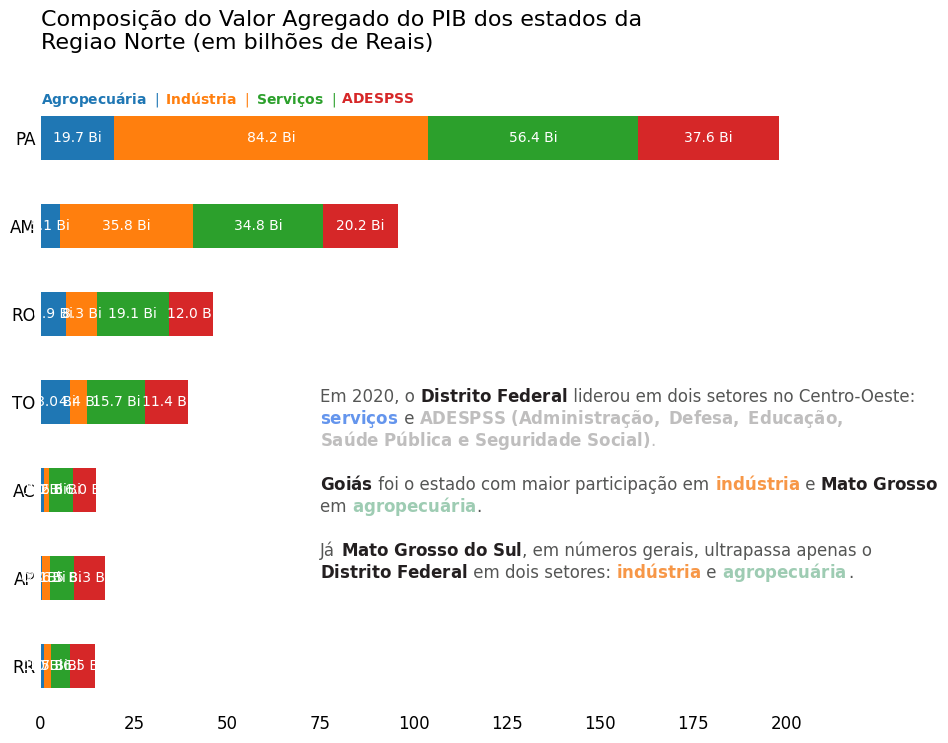

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10,8))

norte2020.plot(kind = 'barh', stacked = True, ax= ax)
ax.set_ylabel('')
ax.set_frame_on(False)
ax.set_title('Composição do Valor Agregado do PIB dos estados da\nRegiao Norte (em bilhões de Reais)',
             fontsize= 16, loc = 'left', x = 0, y = 1.06)
ax.yaxis.set_tick_params(length = 0, labelsize = 12)
ax.xaxis.set_tick_params(length = 0, labelsize = 12)
ax.legend().remove()

cores = [[bar[0].get_facecolor() for bar in ax.containers]]
texto_colorido(0, 6.4,'$\\bf{Agropecuária}$  | || $\\bf{Indústria}$  | || $\\bf{Serviços}$  | || $\\bf{ADESPSS}$',
               cores = cores, ax = ax)

for container in ax.containers:
  label = [f'{valor.get_width():.1f} Bi' for valor in container]
  ax.bar_label(container, labels= label, fontsize = 10, color = 'white', label_type = 'center')

texto_colorido(
    75, 1,                                                             # coordenadas
    'Em 2020, o ||$\\bf{Distrito\ Federal}$|| liderou em dois setores no Centro-Oeste:\n'
    '$\\bf{serviços}$|| e ||$\\bf{ADESPSS\ (Administração,\ Defesa,\ Educação,}$\n'
    '$\\bf{Saúde\ Pública\ e\ Seguridade\ Social)}$.\n'
    '\n'
    '$\\bf{Goiás}$|| foi o estado com maior participação em ||$\\bf{indústria}$|| e ||$\\bf{Mato\ Grosso}$\n'
    'em ||$\\bf{agropecuária}$||.\n'
    '\n'
    'Já ||$\\bf{Mato\ Grosso\ do\ Sul}$||, em números gerais, ultrapassa apenas o\n'
    '$\\bf{Distrito\ Federal}$|| em dois setores: ||$\\bf{indústria}$|| e ||$\\bf{agropecuária}$ ||.',
    [[CINZA3, CINZA1, CINZA3],                     # linha 1                          # cores
     [AZUL3, CINZA3, CINZA5],                      # linha 2
     [CINZA5],                                     # linha 3
     [CINZA3],                                     # linha 4
     [CINZA1, CINZA3, LARANJA1, CINZA3, CINZA1],   # linha 5
     [CINZA3, VERDE3, CINZA3],                     # linha 6
     [CINZA3],                                     # linha 7
     [CINZA3, CINZA1, CINZA3],     # linha 8
     [CINZA1, CINZA3, LARANJA1, CINZA3, VERDE3, CINZA3],   # linha 9
    ],
    esp=22,         # espaçamento
    ax=ax,          # figura onde desenhar o texto
    fontsize=12)

## Aula 04 - Investigando a variação dos dados

### Desafio 1

No setor de Administração, Defesa, Educação, Saúde Pública e Seguridade Social (ADESPSS), como estão distribuídos os valores adicionados por região, em valores relativos, dentro do período da base dos dados (2002 - 2020)?

In [20]:
pib.tail()


,ano,sigla_uf,regiao,pib,impostos_liquidos,va,va_agropecuaria,va_industria,va_servicos,va_adespss
508,2016,DF,Centro-Oeste,235540044811,29145619376,206394425435,820754661,9662357225,103859865830,92051447720
509,2017,DF,Centro-Oeste,244722249337,29120461647,215601787690,828313642,8448768236,108322119432,98002586380
510,2018,DF,Centro-Oeste,254817204692,28692287369,226124917323,1022690641,9541298290,113768086938,101792841454
511,2019,DF,Centro-Oeste,273613711477,30686607647,242927103829,992393584,9453608031,125261853488,107219248727
512,2020,DF,Centro-Oeste,265847334003,25466227775,240381106228,1623976909,10942472569,116547655370,111267001381


In [21]:
adespss = pib.copy()
adespss = adespss[['ano', 'regiao', 'va_adespss']]
adespss = pd.crosstab(index = adespss.ano, columns = adespss.regiao, values = adespss.va_adespss, aggfunc = 'sum', normalize = 'index')
adespss = adespss[['Sudeste', 'Nordeste', 'Centro-Oeste', 'Sul', 'Norte']]
adespss

regiao,Sudeste,Nordeste,Centro-Oeste,Sul,Norte
ano,,,,,
2002,0.458007,0.192455,0.152418,0.124381,0.072740
2003,0.451704,0.191737,0.152342,0.130818,0.073399
2004,0.446684,0.190321,0.160342,0.128185,0.074469
2005,0.444145,0.195103,0.157211,0.128325,0.075215
2006,0.436995,0.199905,0.160231,0.126113,0.076756
2007,0.442298,0.198586,0.156497,0.126176,0.076443
2008,0.441890,0.199976,0.157529,0.124272,0.076333
2009,0.438409,0.204467,0.159398,0.120734,0.076992
2010,0.425501,0.208083,0.158812,0.128801,0.078803


<ipython-input-22-dd9336f43852>:8: UserWarning:

FixedFormatter should only be used together with FixedLocator



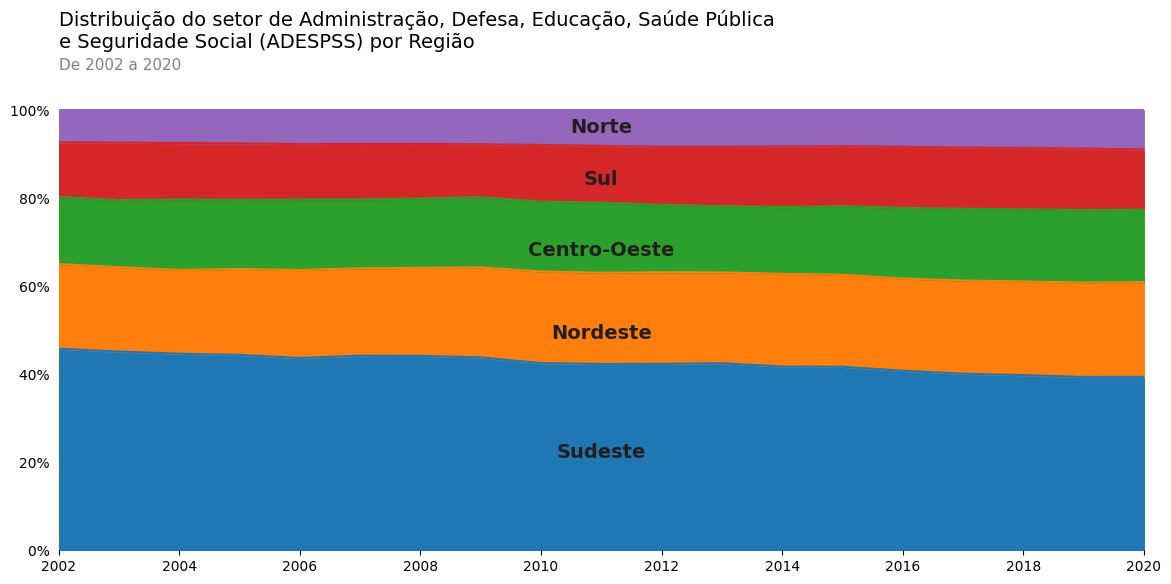

In [22]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize = (14,6))

adespss.plot(kind = 'area', ax=ax , xticks = range(2002, 2021, 2))
ax.set_frame_on(False)
ax.set_yticklabels([f"{val}% " for val in range(0,120,20)])
ax.set_title('Distribuição do setor de Administração, Defesa, Educação, Saúde Pública\ne Seguridade Social (ADESPSS) por Região', size = 14, loc = 'left', y= 1.07)
ax.text(0, 1.04, 'De 2002 a 2020', size = 11, color= 'grey', transform=ax.transAxes)
ax.tick_params(axis='y', which='both', length=0)
ax.set_xlabel('')
ax.legend().remove()
ax.set_xbound(2002,2020)

reg = adespss.columns
y_pos = [0.21, 0.48, 0.67, 0.83, 0.95]
for i in range(len(reg)):
  ax.text(2011, y_pos[i], f'{reg[i]}', color = CINZA1, weight = "bold", fontsize = 14, ha="center", transform=ax.transData)

### Desafio 2

Qual foi a variação do PIB relativo à indústria nas regiões do Brasil nos anos de 2010, 2015 e 2020?

In [23]:
pib_industria = pib.copy()
pib_industria = pib_industria.query('ano == [2010, 2015, 2020]')[['ano', 'regiao', 'va_industria']]
pib_industria = pd.crosstab(index = pib_industria.ano, columns = pib_industria.regiao, values = pib_industria.va_industria, aggfunc = 'sum', normalize = 'index')
pib_industria.sort_values(inplace = True, axis = 1, ascending = False, by = 2010)
pib_industria = (pib_industria*100).round(1)
pib_industria


regiao,Sudeste,Sul,Nordeste,Norte,Centro-Oeste
ano,,,,,
2010,58.8,17.1,11.6,6.5,6.1
2015,55.0,19.0,12.9,6.1,7.0
2020,52.0,19.2,12.2,9.3,7.3


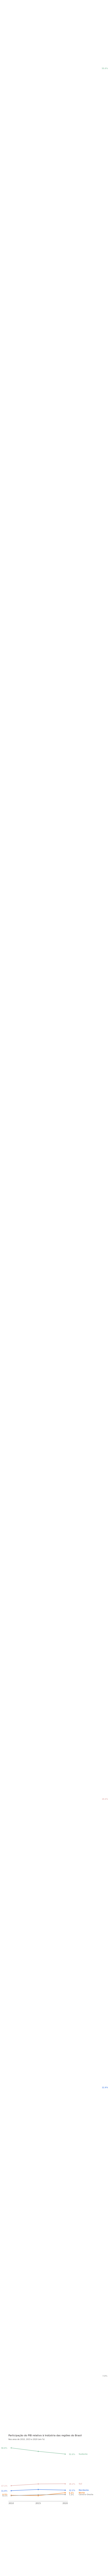

In [24]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize = (7,7))

cores = [VERDE3, VERMELHO2, AZUL3, LARANJA1, CINZA4]

ax1.set_title('Participação do PIB relativo à Indústria das regiões do Brasil', fontsize = 16, color = CINZA1, loc='left', pad = 40)
ax1.text(0, 1.05, "Nos anos de 2010, 2015 e 2020 (em %)", transform=ax1.transAxes, color= CINZA3, fontsize=12, ha='left', va='center')


ax2 = ax1.twinx()
ax1.set_ylim([0,65])
ax2.set_ylim([0,65])
ax1.set_xbound(2010,2020)
ax2.set_xbound(2010,2020)

ax1.set_xticks([2010,2015,2020])
ax1.tick_params(left = False)
ax2.tick_params(right = False)
ax2.set_frame_on(False)
ax1.spines[["top", "left", "right"]].set_visible(False)

for i in range(5):
  ax1.scatter(x= pib_industria.index, y = pib_industria.iloc[:,i], color = cores[i], s = 50)
  ax1.plot(pib_industria.index, pib_industria.iloc[:,i], color = cores[i], lw = 3)
  ax1.text(x = 2022.5, y = pib_industria.iloc[-1,i], s = pib_industria.columns[i], fontsize = 13, fontweight = 'bold',
           linespacing = 1.5, color = cores[i], va = 'center')

plt.setp(ax1, xticks = [2010,2015,2020], xticklabels = ['2010', '2015','2020'],
         yticks = pib_industria.iloc[0,:],
         yticklabels = [f'{str(valor)}%' if i != 3 else f'{str(valor)}%\n' for i,valor in enumerate(pib_industria.iloc[0,:])]
         )

plt.setp(ax2, yticks = pib_industria.iloc[-1,:],
         yticklabels = [f'{str(valor)}%' for i,valor in enumerate(pib_industria.iloc[-1,:])]
         )

valores = pib_industria.iloc[1,:].values
y_pos = [52, 16, 10, -1.5, 4]
for i in range(len(valores)):
  ax1.text(2015, y_pos[i], f'{valores[i]}%', weight = "bold", fontsize = 12, color = cores[i], ha="center", transform=ax.transData)


for ax in (ax1, ax2):
  for i, item in enumerate(ax.get_yticklabels()):
    item.set_fontsize(12)
    item.set_fontweight('bold')
    item.set_color(cores[i])

ax1.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA3, width = 0)
ax1.spines['bottom'].set_color(CINZA3)

plt.show()

## Aula 05 - Relacionando dados

### Desafio 1

Qual a relação entre as notas das disciplinas de língua portuguesa e matemática do SAEB no Ensino Fundamental Anos Finais no período das 5 últimas avaliações?

Dica: Utilize a coluna de ano para definir as cores do gráfico. Além disso, para ter uma noção da pontuação mínima para proficiência, você pode verificar esse [link do QEdu ](https://conteudos.qedu.org.br/academia/aprendizado-adequado/?repeat=w3tc)sobre aprendizado adequado.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-cursos/dataviz-graficos-composicao-relacionamento/main/dados/ideb_reg_2005_2021.csv"

dados = pd.read_csv(url)
efaf_pm = dados.query('ano >=2013 and anos_escolares == "EFAF"')[['ano', 'nota_saeb_lingua_portuguesa', 'nota_saeb_matematica']]
efaf_pm.head()


,ano,nota_saeb_lingua_portuguesa,nota_saeb_matematica
120,2013,242.41,246.08
123,2013,280.08,291.98
126,2013,229.52,232.36
129,2013,273.80,283.20
132,2013,235.19,235.36


In [26]:
import seaborn as sns

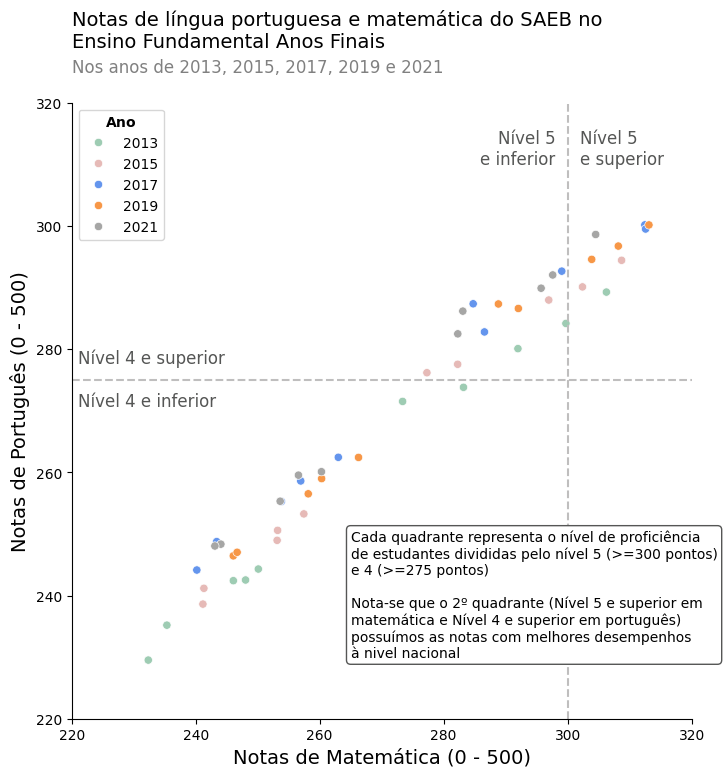

In [27]:
fig, ax = plt.subplots(figsize = (8,8))

cores = [VERDE3, VERMELHO2, AZUL3, LARANJA1, CINZA4]

ax = sns.scatterplot(data= efaf_pm, x = 'nota_saeb_matematica', y = 'nota_saeb_lingua_portuguesa', hue = 'ano', palette = cores)
ax.set_xlabel('Notas de Matemática (0 - 500)',  fontsize = 14)
ax.set_ylabel('Notas de Português (0 - 500)', fontsize = 14)
ax.legend(bbox_to_anchor=(0, 1), title='$\\bf{Ano}$', title_fontsize  = 10, fontsize = 10, loc='upper left', bbox_transform=ax.transAxes)
ax.set_title('Notas de língua portuguesa e matemática do SAEB no\nEnsino Fundamental Anos Finais',size = 14, pad = 40 , x = 0, loc = 'left')
ax.text(0,1.05, 'Nos anos de 2013, 2015, 2017, 2019 e 2021', fontsize = 12, color ='grey', transform=ax.transAxes)
sns.despine()
ax.set_xlim(220,320)
ax.set_ylim(220,320)

# Limites das notas em no eixo y (notas de português) - 275 pontos (proficiência)
ax.text(ax.get_xlim()[0] + 1, 277, 'Nível 4 e superior', fontsize=12, color = CINZA3, va = "bottom")
ax.text(ax.get_xlim()[0] + 1 , 273, 'Nível 4 e inferior', fontsize=12, color = CINZA3, va = "top")
plt.axhline(y = 275, color = CINZA5, linestyle='--')

# Limites das notas em no eixo x (notas de matemática) - 300 pontos (proficiência)
ax.text(298, ax.get_ylim()[1] - 10, 'Nível 5\ne inferior', fontsize=12, color = CINZA3, ha="right")
ax.text(302, ax.get_ylim()[1] - 10, 'Nível 5\ne superior', fontsize=12, color = CINZA3, ha="left")
plt.axvline(x = 300, color = CINZA5, linestyle='--')

ax.annotate("Cada quadrante representa o nível de proficiência\nde estudantes divididas pelo nível 5 (>=300 pontos)\ne 4 (>=275 pontos)\n\n"
            "Nota-se que o 2º quadrante (Nível 5 e superior em \nmatemática e Nível 4 e superior em português)\n"
            "possuímos as notas com melhores desempenhos \nà nivel nacional", xy=(265, 230), xycoords='data',
            bbox=dict(boxstyle="round", fc=BRANCO, ec=CINZA3),
            xytext=(0, 0), textcoords='offset points')

plt.show()

### Desafio 2

Qual seria a relação entre as notas do SAEB no Ensino Médio? Conseguimos notar como as duas se comportam em relação a taxa de aprovação e as regiões?

In [82]:
saeb_em = dados.query('anos_escolares == "EM"')[['regiao', 'taxa_aprovacao', 'nota_saeb_matematica', 'nota_saeb_lingua_portuguesa']]
saeb_em.rename(columns = {'taxa_aprovacao':'Taxa de Aprovação', 'regiao':'Região'}, inplace = True)
saeb_em

,Região,Taxa de Aprovação,nota_saeb_matematica,nota_saeb_lingua_portuguesa
2,Centro-Oeste,68.0,261.23,251.52
5,Centro-Oeste,92.4,338.52,309.85
8,Nordeste,68.2,247.52,237.10
11,Nordeste,90.8,319.33,299.08
14,Norte,68.8,243.61,236.07
...,...,...,...,...
265,Sudeste,92.9,267.04,274.92
266,Sul,98.3,329.04,317.96
267,Sul,88.2,276.23,280.28
268,Centro-Oeste,98.6,324.06,313.85


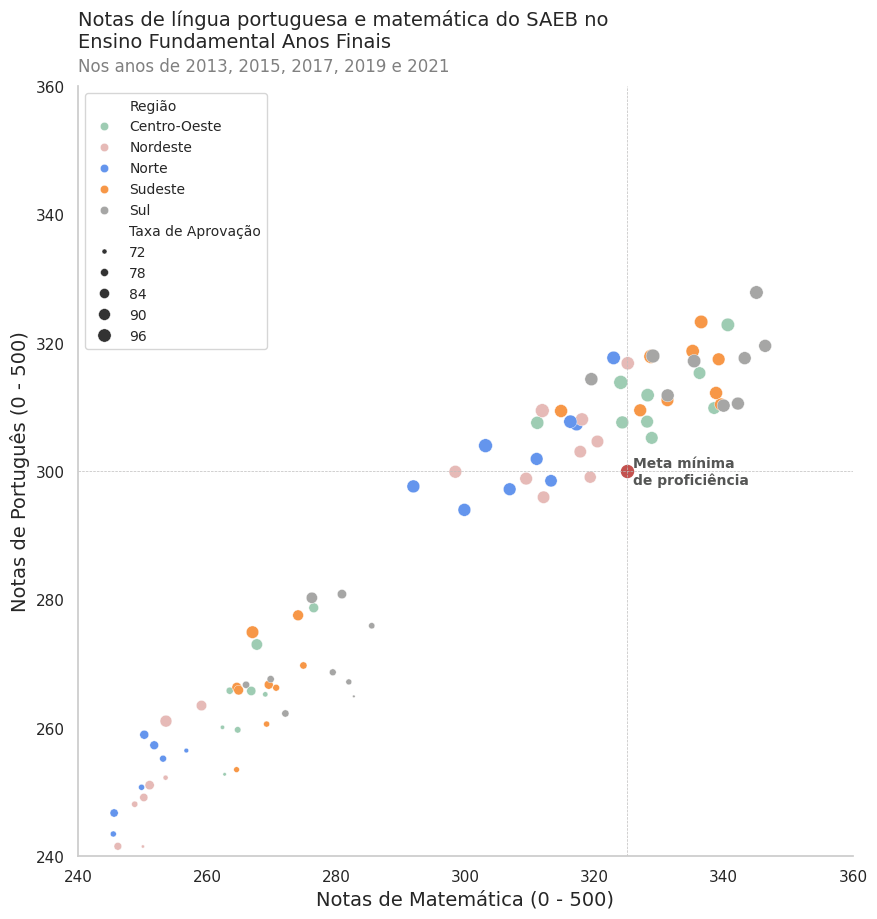

In [84]:
fig, ax = plt.subplots(figsize =(10,10))

ax = sns.scatterplot(data = saeb_em, x = 'nota_saeb_matematica', y = 'nota_saeb_lingua_portuguesa', hue = 'Região', size = 'Taxa de Aprovação', sizes = (0,100),  palette = cores)
plt.suptitle('Notas de língua portuguesa e matemática do SAEB no\nEnsino Fundamental Anos Finais',size = 14 , x = 0, y = 1.1 , ha = 'left' , transform=ax.transAxes)
plt.title(x = 0, y = 1.02, label = 'Nos anos de 2013, 2015, 2017, 2019 e 2021', fontsize = 12, color ='grey', ha = 'left', transform=ax.transAxes)

ax.set_xlabel('Notas de Matemática (0 - 500)',  fontsize = 14)
ax.set_ylabel('Notas de Português (0 - 500)', fontsize = 14)
ax.legend(bbox_to_anchor=(0, 1), title_fontsize  = 10, fontsize = 10, loc='upper left', bbox_transform=ax.transAxes)
sns.despine()
ax.set_xlim(240,360)
ax.set_ylim(240,360)

ax.scatter([325], [300], color=VERMELHO1, s=75)
plt.axvline(x = 325, color = CINZA5, linestyle='--', linewidth=0.5)
plt.axhline(y = 300, color = CINZA5, linestyle='--', linewidth=0.5)
ax.text(326, 298, 'Meta mínima\nde proficiência', color=CINZA3, fontsize=10, fontweight='bold')

plt.grid(None)
